# Model

### Importing the required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

### Step 1: Load the dataset

In [3]:
df = pd.read_csv('creditcard.csv')

### Step 2: Pre-process the data
#### Check for missing values

In [4]:
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)

### Visualize the data
#### Histogram of the 'Amount' feature

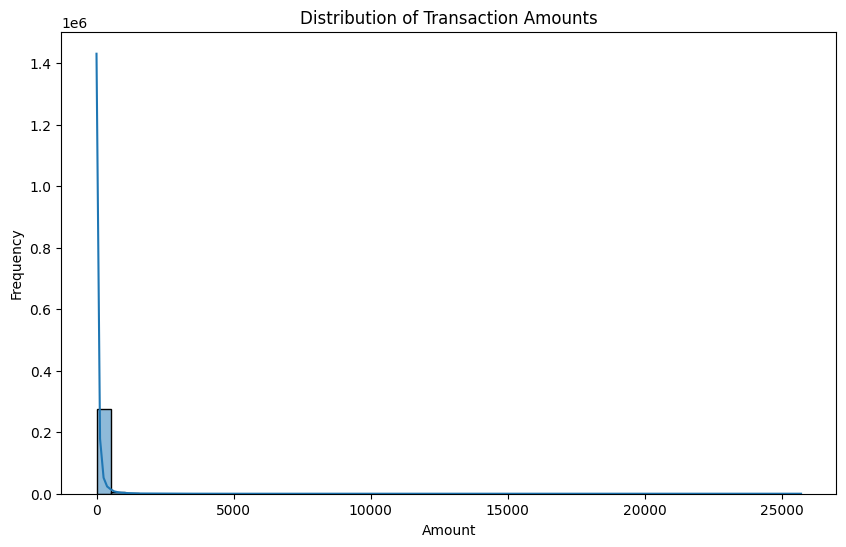

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

#### Boxplot to check for outliers

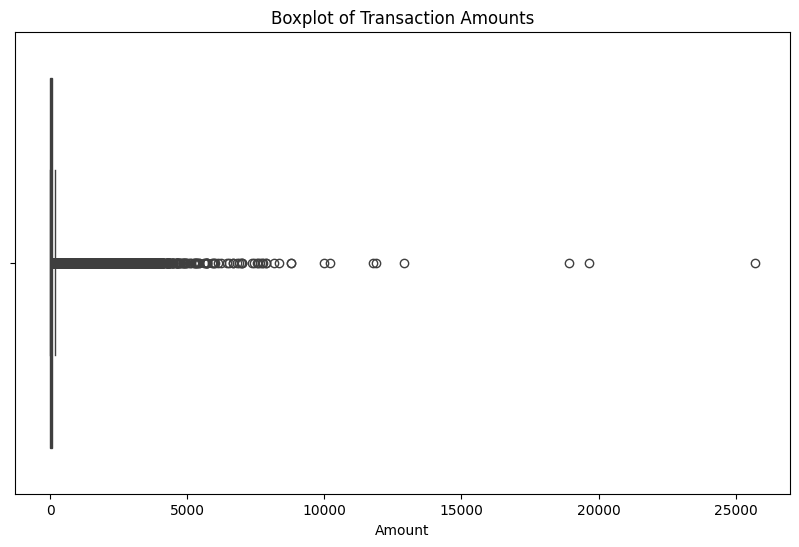

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

#### Resampling using SMOTE

In [7]:

X = df.drop('Class', axis=1)
y = df['Class']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

### Step 3: Train the model
#### Split the data into training and testing sets

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)



In [9]:
# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step 4: Evaluate the model
#### Make predictions on the test set

In [10]:

y_pred = model.predict(X_test)


### Calculate accuracy and F1 score


In [11]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9737
F1 Score: 0.9735


#### Confusion Matrix

In [12]:

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[83655  1494]
 [ 3001 82439]]


#### ROC Curve and AUC


In [13]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

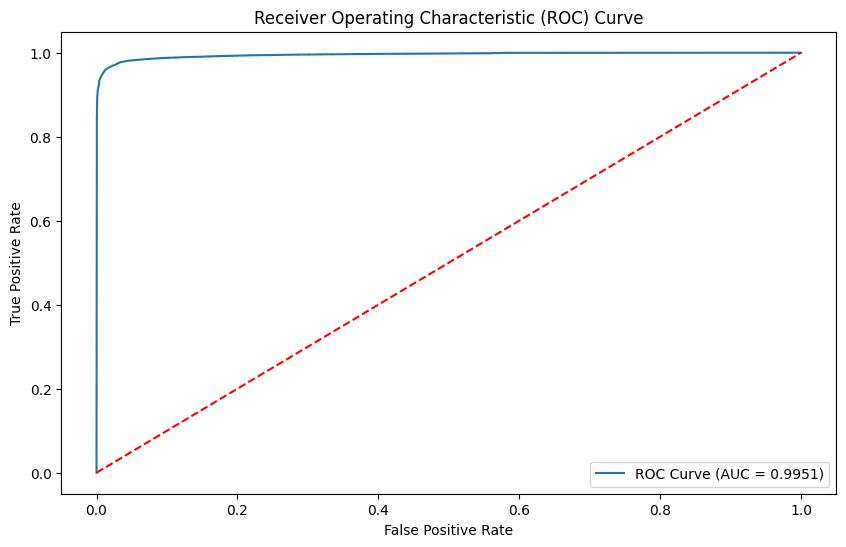

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
print(f'ROC AUC: {roc_auc:.4f}')

ROC AUC: 0.9951
